In [1]:
import os
import sys
import gains as genetic
from gains.salt_generator import *
import pandas as pd
import rdkit
import pickle
from math import exp
import numpy as np
import random
import unittest
import datetime
import sys
import sklearn
import salty

from numpy import array, all
from rdkit.Chem import Draw
from rdkit import RDConfig
from rdkit.Chem import FragmentCatalog
from rdkit import RDConfig
from rdkit import DataStructs
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit import Chem
from rdkit.Chem import AllChem as Chem
from rdkit.Chem.Draw import ShowMol
from rdkit.Chem.Draw import SimilarityMaps
from rdkit.ML.Descriptors.MoleculeDescriptors import\
    MolecularDescriptorCalculator as calculator

%matplotlib inline

tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]   

# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)  

In [2]:
target = 1000
model_ID = "density_m3"
generate_solvent(target, model_ID, sim_bounds=[0.1, 1], heavy_atom_limit=1e8, hits=1)

CCCCn1cc[n+](c1C)C	0.92707	starting structure
CCCC(C1CC1)n1cc[n+](C)c1C	0.9441600000000001	add_rdkit_fragment
CCCC(C1CC1)n1cc[n+](C)c1	0.94447	remove_atom
CCCc1c[n+](C)cn1C(CCC)C1CC1	0.9785499999999999	add_custom_fragment
CCCCC(CCC)(C1CC1)n1c[n+](C)cc1CCC	0.9863200000000001	add_custom_fragment
CCCCC(CC(C)CC)(C1CC1)n1c[n+](C)cc1CCC	0.9969600000000001	add_custom_fragment
number of atoms: 	22
mutation attempts: 	29
with density: 		996.96 (kg/m)
similarity score:       0.545
molecular relative: 	1-butyl-3-methylimidazolium



,Salt ID,Salt Smiles,Cation Heavy Atoms,Tanimoto Similarity Score,Molecular Relative,Anion,Model Density,MD Density,Error
0,C01_A01,CCCCC(CC(C)CC)(C1CC1)n1c[n+](C)cc1CCC.CC(N)C(=...,22,0.544715,1-butyl-3-methylimidazolium,L-alaninate,996.96,NaN,NaN


In [3]:
salty.check_name("phosphate")

'[O-]P(=O)([O-])[O-]'

In [119]:
out = pd.DataFrame()
for j in np.arange(40,100,10):
    df = pd.read_csv("../../designer_molecules/pdb_files/model_3/1500kgm3/%s/salt_log.csv" % j) #or salt_candidates
    inner = pd.DataFrame()
    for i in range(1,26):
        if i < 10:
            CAT_ID = "C0%s" % i
            AN_ID = "A0%s" % i
        else:
            CAT_ID = "C%s" % i
            AN_ID = "A%s" % i
        Salt_ID = CAT_ID + "_" + AN_ID
        try:
            mean = np.round(pd.read_csv("../../designer_molecules/pdb_files/model_3/1500kgm3/%s/%s.dens" % (j, Salt_ID)).describe().loc["mean"][1])
            std = np.round(pd.read_csv("../../designer_molecules/pdb_files/model_3/1500kgm3/%s/%s.dens" % (j, Salt_ID)).describe().loc["std"][1])
            value = ("{}{}{}".format(mean," +/- ", std))
            true = df.loc[df["Salt ID"] == Salt_ID, "Model Density"]
            difference = (true - mean)/true*100
            df.loc[df["Salt ID"] == Salt_ID, "MD Density"] = value
            df.loc[df["Salt ID"] == Salt_ID, "Error"] = difference #this is % Difference in old version
        except:
            pass
    df.dropna(inplace=True)
    out = pd.concat([df, out], axis=0) 
out.reset_index(drop=True, inplace=True)
out

,Salt ID,Salt Smiles,Cation Heavy Atoms,Tanimoto Similarity Score,Molecular Relative,Anion,Model Density,MD Density,Error
0,C03_A03,O=C(C[n+]1ccccc1)OCCO.O=S(=O)(F)[N-]S(=O)(=O)F,13,0.917647,1-(2-ethoxy-2-oxoethyl)-pyridinium,bis(fluorosulfonyl)amide,1514.04,1511.0 +/- 33.0,0.200787
1,C05_A05,COCCn1cc[n+](C)c1C.O=S(=O)([O-])C(F)(F)C(F)OC(...,11,0.915493,"1-(2-hydroxyethyl)-2,3-dimethylimidazolium","1,1,2-trifluoro-2-(perfluoroethoxy)ethanesulfo...",1502.11,1423.0 +/- 28.0,5.266592
2,C06_A06,C[n+]1ccn(CCCS(=O)(=O)OO)c1.O=S(=O)([N-]S(=O)(...,14,0.924528,1-methyl-3-(3-sulfopropyl)-imidazolium,bis[(trifluoromethyl)sulfonyl]imide,1498.09,1593.0 +/- 37.0,-6.335400
3,C09_A09,CCC[N+](C)(C)CCC.O=S(=O)([N-]S(=O)(=O)C(F)(F)C...,9,0.903226,"N-ethyl-N,N-dimethyl-1-propanaminium",bis(perfluoroethylsulfonyl)imide,1491.02,1453.0 +/- 51.0,2.549932
4,C11_A11,CC(S)CCCC[n+]1ccn(CCC#N)c1.O=S(=O)([O-])C(F)(F...,16,0.925373,3-(2-cyanoethyl)-1-hexyl-1H-imidazolium,"1,1,2-trifluoro-2-(perfluoroethoxy)ethanesulfo...",1496.91,1364.0 +/- 46.0,8.878957
5,C13_A13,Cn1cc[n+](CCCCCCOS)c1.O=S(=O)([O-])C(F)(F)C(F)...,14,0.930851,3-(6-hydroxyhexyl)-1-methylimidazolium,"1,1,2,3,3,3-hexafluoro-1-propanesulfonate",1500.32,1367.0 +/- 39.0,8.886104
6,C14_A14,N#CCCn1cc[n+](CC=CO)c1.O=S(=O)([N-]S(=O)(=O)C(...,13,0.932367,3-allyl-1-(2-cyanoethyl)-1H-imidazolium,bis(trifluoromethylsulfonyl)imide,1513.98,1512.0 +/- 33.0,0.130781
7,C15_A15,CC[n+]1ccn(CC(C)C)c1.O=S(=O)([N-]S(=O)(=O)C(F)...,11,0.963235,1-isobutyl-3-methylimidazolium,bis(perfluoroethylsulfonyl)imide,1488.39,1446.0 +/- 56.0,2.848044
8,C19_A19,CCSCCCn1c(C)cc(C)[n+]1-c1ccccc1.O=S(=O)([N-]S(...,19,0.913924,"1-phenyl-2-butyl-3,5-dimethylpyrazolium",bis(perfluoroethylsulfonyl)imide,1485.03,1376.0 +/- 32.0,7.341939
9,C22_A22,C[N+]1(C)CCOCC1.O=S(=O)([N-]S(=O)(=O)C(F)(F)F)...,8,0.916667,4-ethyl-4-methylmorpholin-4-ium,bis[(trifluoromethyl)sulfonyl]imide,1507.34,1608.0 +/- 47.0,-6.677989


In [81]:
from gains import salt_generator

In [85]:
prediction

978.16999999999996

In [146]:
target = 1000
model_ID = "density_m2"
for i in range(len(out["Salt Smiles"])):
    genes = out_1000["Salt Smiles"][i].split(".")[0]
    anion = Chem.MolFromSmiles(out_1000["Salt Smiles"][i].split(".")[1])
    score, prediction = salt_generator.get_fitness(anion, genes, target, model_ID)
    out_1000["Model Density"][i] = prediction
    diff = (float(prediction) - float(out["MD Density"][i].split()[0])) / float(out["MD Density"][i].split()[0]) * 100
    out_1000["% Difference"][i] = diff

/home/wesley/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator MLPRegressor from version 0.18.1 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


FileNotFoundError: [Errno 2] No such file or directory: '/home/wesley/anaconda3/envs/py36/lib/python3.6/site-packages/gains/data/density_m2_descriptors.csv'

In [137]:
out_1000["Model Density"]

0      978
1      999
2     1024
3     1017
4     1036
5     1013
6     1029
7      982
8     1028
9     1023
10     995
11    1025
12    1010
13    1113
14    1003
15    1010
16     993
17    1008
18     971
19    1004
20    1023
21    1057
22     879
23    1098
24    1052
25    1051
26    1014
27    1022
28    1082
29    1031
      ... 
32    1105
33    1007
34     996
35     974
36     977
37    1022
38    1027
39    1003
40    1157
41    1186
42     976
43    1230
44    1117
45    1001
46    1037
47    1096
48    1050
49    1131
50    1000
51    1042
52    1099
53    1198
54    1129
55    1029
56    1045
57    1047
58    1150
59    1020
60    1104
61    1037
Name: Model Density, Length: 62, dtype: int64

In [53]:
out.drop([23,55,58], inplace=True)
out.reset_index(inplace=True)

In [ ]:
driver = webdriver.Chrome()
driver.get("http://www.chemspider.com/")
out.reset_index(inplace=True)
results=[]

In [ ]:
###This cell checks that entries are not existent in the world
from selenium import webdriver
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import time

for i in range(52,out.shape[0]):
    ion = out["Salt Smiles"][i].split(".")[0]
    search = driver.find_element_by_xpath("//*[@id=\"ctl00_ctl00_qs_query\"]")
    search.clear()
    search.send_keys(ion)
    submit = driver.find_element_by_xpath("//*[@id=\"ctl00_ctl00_search_btn\"]")
    submit.click()
    time.sleep(5)
    try:
        name = driver.find_element_by_xpath("//*[@id=\"ctl00_ctl00_ContentSection"\
                                            "_ContentPlaceHolder1_RecordViewDetails"\
                                            "_rptDetailsView_ctl00_WrapTitle\"]")
        results.append([ion, name.text])
        print(ion, name.text)
        time.sleep(3)
    except:
        results.append([ion, "new molecule"])
        print("{}\t{}".format("name not found for:",ion))

In [20]:
b = pd.DataFrame(a)
b.to_csv("existance_results.csv",index=False, indicator=True)

NameError: name 'a' is not defined

In [7]:
results
a = np.array(results)
a[:,1]

NameError: name 'results' is not defined

In [132]:
md_1500

['1511.0',
 '1423.0',
 '1593.0',
 '1453.0',
 '1364.0',
 '1367.0',
 '1512.0',
 '1446.0',
 '1376.0',
 '1608.0',
 '1510.0',
 '1498.0',
 '1320.0',
 '1356.0',
 '1349.0',
 '1387.0',
 '1349.0',
 '1493.0',
 '1500.0',
 '1314.0',
 '1505.0',
 '1432.0',
 '1530.0',
 '1407.0',
 '1348.0',
 '1503.0',
 '1425.0',
 '1359.0',
 '1516.0',
 '1256.0',
 '1463.0',
 '1644.0',
 '1337.0',
 '1295.0',
 '1494.0',
 '1465.0',
 '1270.0',
 '1211.0',
 '1189.0',
 '1307.0',
 '1337.0',
 '1494.0',
 '1450.0',
 '1564.0']

In [122]:
md_1000 = []
std_1000 = []
for i in range(out_1000.shape[0]):
    md_1000.append(out_1000["MD Density"][i].split()[0])
    std_1000.append(out_1000["MD Density"][i].split()[2])
md_1300 = []
std_1300 = []
for i in range(out_1300.shape[0]):
    md_1300.append(out_1300["MD Density"][i].split()[0])
    std_1300.append(out_1300["MD Density"][i].split()[2])
md_1500 = []
std_1500 = []
for i in range(out_1500.shape[0]):
    md_1500.append(out_1500["MD Density"][i].split()[0])
    std_1500.append(out_1500["MD Density"][i].split()[2])

array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000,
       1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000,
       1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000,
       1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000,
       1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000,
       1000, 1000, 1000, 1000, 1000, 1000, 1000])

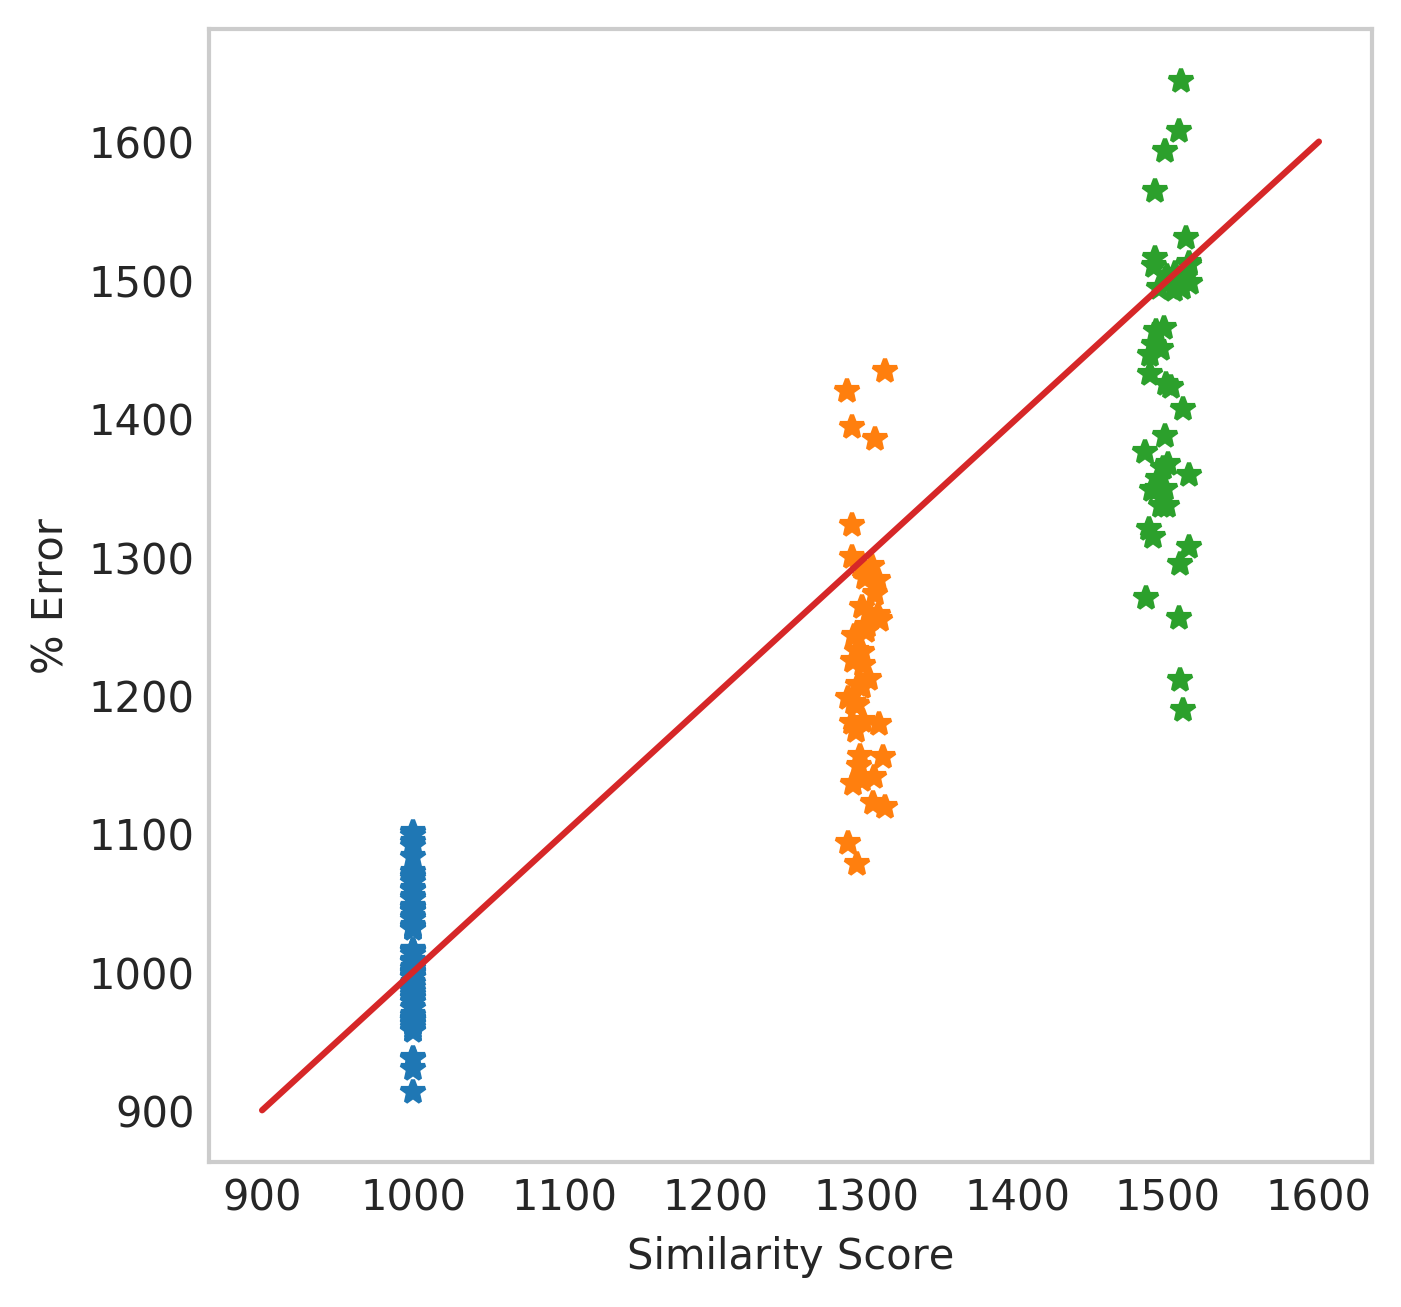

In [145]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as lin
#poop = np.abs(out["% Difference"].values)
with plt.style.context('seaborn-whitegrid'):
    fig=plt.figure(figsize=(5,5), dpi=300)
    ax = fig.add_subplot(111)
    ax.plot(np.full(62,1000), md_1000, linestyle="", marker="*", label=None)
    ax.plot(out_1300["Model Density"], md_1300, linestyle="", marker="*", label=None)
    ax.plot(out_1500["Model Density"], md_1500, linestyle="", marker="*", label=None)
    ax.plot([900,1600], [900,1600], linestyle="-", label=None)
    #ax.plot([0,X0],[Y0,0], label="Best fit R-squared: 0.25")
    #ax.set_xlim(0.4,1)
    #ax.set_ylim(0,11)
    #ax.legend(bbox_to_anchor=(1,1))
    ax.set_ylabel("% Error")
    ax.set_xlabel("Similarity Score")
#     plt.xlim(900,1100)
#     plt.ylim(900,1100)
    ax.grid()

In [101]:
df = salty.load_data("cationInfo.csv")
parent_candidates = df["smiles"].unique()
to_plot=[]
for i in range(out.shape[0]):
    smi = out.iloc[i]["Salt Smiles"].split(".")[0]
    mol = Chem.MolFromSmiles(smi)
    chro = genetic.Chromosome(smi, 0)
    score, index = genetic.molecular_similarity(chro, parent_candidates, all=True)
    score.append(out.iloc[i]["% Difference"])
    to_plot.append(score)
points = np.array(to_plot)
sim_scores = []
for i in range(points.shape[1]-1):
    sim_scores.append(points[:,i])

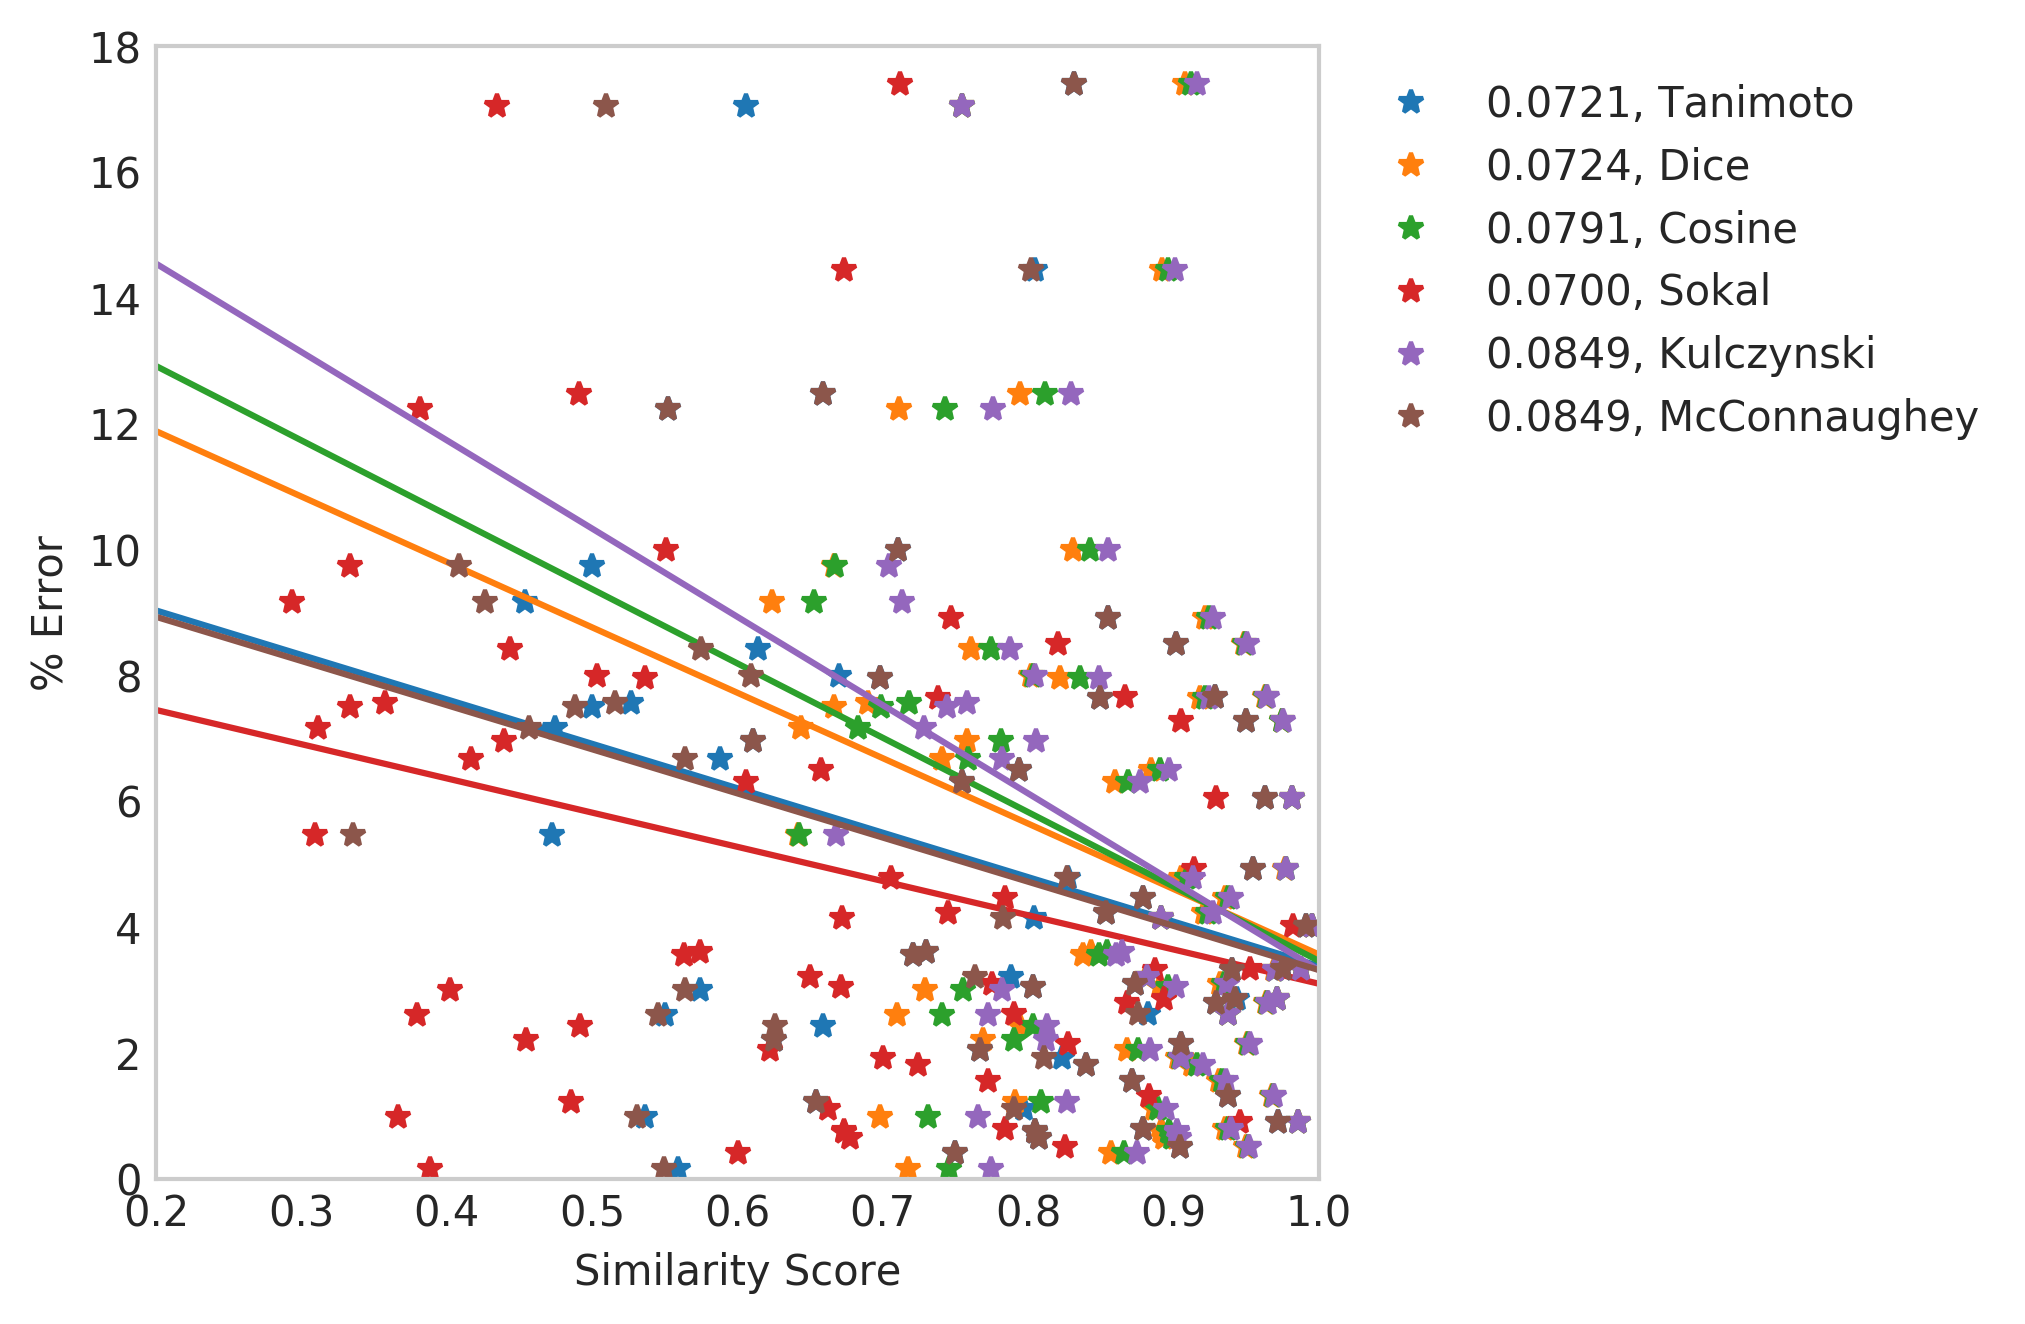

In [104]:
metrics = ["Tanimoto", "Dice", "Cosine", "Sokal", 
           "Kulczynski", "McConnaughey"]
r_sqr = []
import matplotlib.pyplot as plt
with plt.style.context('seaborn-whitegrid'):
    fig=plt.figure(figsize=(5,5), dpi=300)
    ax = fig.add_subplot(111)
    for i in range(len(sim_scores)):
        X=sim_scores[i].reshape(-1,1)
        Y=np.abs(out["% Difference"]).values.reshape(-1,1)
        model = lin()
        model.fit(X,Y)
        if model.coef_ < 0:
            Y0=model.intercept_
            X0=abs(model.intercept_/model.coef_)
        else:
            print("pos corr")
        r_sqr.append(model.score(X,Y))
        for j in range(len(sim_scores[0])):
        
            if j == 0:
                ax.plot(sim_scores[i][j], np.abs(out.iloc[j]["% Difference"]), 
                        linestyle="", marker="*", c=tableau20[i*2],
                       label="{:3.4f}, {}".format(r_sqr[i], metrics[i]))
                ax.plot([0,X0],[Y0,0])
    
            else:
                ax.plot(sim_scores[i][j], np.abs(out.iloc[j]["% Difference"]), 
                        linestyle="", marker="*", c=tableau20[i*2])
    ax.set_xlim(0.2,1)
    ax.set_ylim(0,18)
    ax.set_ylabel("% Error")
    ax.set_xlabel("Similarity Score")
    ax.legend(bbox_to_anchor=(1.6,1))
    
    ax.grid()
fig.savefig(filename='../../designer_molecules/3.eps', 
                       bbox_inches='tight', format='eps') 

In [ ]:
def guess_password(target):
    startTime = datetime.datetime.now()

    def fnGetFitness(genes):
        return get_fitness(anion, genes, target)

    def fnDisplay(candidate, mutation):
        display(candidate, mutation, startTime)

    def fnShowIon(genes, target, mutation_attempts):
        show_ion(genes, target, mutation_attempts)

    optimalFitness = 0.99
    best = genetic.get_best(fnGetFitness,\
        optimalFitness, geneSet, fnDisplay,\
                    fnShowIon, target, parent_candidates)
    return best
    
def display(candidate, mutation, startTime):
    timeDiff = datetime.datetime.now() - startTime
    print("{}\t{}\t{}".format(
    candidate.Genes, candidate.Fitness, mutation))
    
def get_fitness(anion, genes, target):
    cation = Chem.MolFromSmiles(genes)
    model = genetic.load_data("density_nn_model.sav", pickleFile=True)
    deslist = genetic.load_data("density_nn_model_descriptors.csv")
    feature_vector=[]
    
    for item in deslist:

        if "anion" in item:
            with genetic.suppress_stdout_stderr():
                feature_vector.append(calculator([item.partition('-')\
                    [0]]).CalcDescriptors(anion)[0])
        elif "cation" in item:
            with genetic.suppress_stdout_stderr():
                feature_vector.append(calculator([item.partition('-')\
                [0]]).CalcDescriptors(cation)[0])          
        elif "Temperature_K" in item:
            feature_vector.append(298.15)
        elif "Pressure_kPa" in item:
            feature_vector.append(101.325)
        else:
            print("unknown descriptor in list: %s" % item)
    features_normalized = (feature_vector-deslist.iloc[0].values)/deslist.iloc[1].values
    prediction = exp(model.predict(np.array(features_normalized).reshape(1,-1))[0])
    error = abs((prediction-target)/target)
    
    return 1-error

def show_ion(genes, target, mutation_attempts):
    print("{}\t{}".format("mutation attempts: ", mutation_attempts))
    print("within 1%% of target density: %s (kg/m) " % target)
    

geneSet = genetic.generate_geneset()

df = genetic.load_data("cationInfo.csv")
# df = df.loc[df["name"].str.contains("imid", case=False)]
# df = df.loc[~df["name"].str.contains("phenyl", case=False)]
# df = df.loc[~df["name"].str.contains("benzyl", case=False)]
# df = df.loc[~df["name"].str.contains("azido", case=False)]
# df = df.loc[~df["name"].str.contains("cyan", case=False)]
# df = df.loc[~df["name"].str.contains("benz", case=False)]
# df = df.loc[~df["name"].str.contains("cyclo", case=False)]
# df = df.loc[~df["name"].str.contains("sulf", case=False)]
# df = df.loc[~df["name"].str.contains("azepinium", case=False)]
parent_candidates = df['smiles'].unique()


df = genetic.load_data("anionInfo.csv")
df = df['smiles'].unique()
ohPickMe = random.sample(range(df.shape[0]),1)
anion = Chem.MolFromSmiles(df[ohPickMe[0]])
print(df[ohPickMe[0]])
img = Draw.MolToMPL(anion)
target = random.sample(range(800,1500),1)[0]

print(target)
best = guess_password(target)
img = Draw.MolToMPL(best.Mol)

In [ ]:
smiles = "CCCCCCc1c(SC)[n+](C)c(S)n1CCCPC"
mol = Chem.MolFromSmiles(smiles)
mol = Chem.AddHs(mol)
Chem.EmbedMolecule(mol, Chem.ETKDG())
Chem.UFFOptimizeMolecule(mol)
a = Draw.MolToMPL(mol)
rdkit.Chem.rdmolfiles.MolToPDBFile(mol, "test", confId=-2)

In [ ]:
def guess_password(target):
    startTime = datetime.datetime.now()

    def fnGetFitness(genes):
        return get_fitness(genes, target)

    def fnDisplay(candidate, mutation):
        display(candidate, mutation, startTime)

    def fnShowIon(genes, target, mutation_attempts):
        show_ion(genes, target, mutation_attempts)

    optimalFitness = get_fitness(target, target)
    best = genetic.get_best(fnGetFitness,\
        optimalFitness, geneSet, fnDisplay,\
                    fnShowIon, target, parent_candidates)
    
def display(candidate, mutation, startTime):
    timeDiff = datetime.datetime.now() - startTime
    print("{}\t{}\t{}\t{}".format(
    candidate.Genes, candidate.Fitness, mutation, timeDiff))
    
def get_fitness(genes, target):
    ms = [Chem.MolFromSmiles(target), Chem.MolFromSmiles(genes)]
    fps = [FingerprintMols.FingerprintMol(x) for x in ms]
    return DataStructs.FingerprintSimilarity(fps[0],fps[1])

def show_ion(genes, target, mutation_attempts):
    mol = Chem.MolFromSmiles(target)
    print("{}\t{}".format("number of atoms: ", mol.GetNumAtoms()))
    print("{}\t{}".format("mutation attempts: ", mutation_attempts))
    

geneSet = genetic.generate_geneset()

df = genetic.load_data("cationInfo.csv")
df = df.loc[df["name"].str.contains("imid", case=False)]
df = df.loc[~df["name"].str.contains("phenyl", case=False)]
df = df.loc[~df["name"].str.contains("benzyl", case=False)]
df = df.loc[~df["name"].str.contains("azido", case=False)]
df = df.loc[~df["name"].str.contains("cyan", case=False)]
df = df.loc[~df["name"].str.contains("benz", case=False)]
df = df.loc[~df["name"].str.contains("cyclo", case=False)]
df = df.loc[~df["name"].str.contains("sulf", case=False)]
df = df.loc[~df["name"].str.contains("azepinium", case=False)]
parent_candidates = df['smiles'].unique()

df = parent_candidates
ohPickMe = random.sample(range(df.shape[0]),1)
target = df[ohPickMe[0]]
guess_password(target)
img = Draw.MolToMPL(Chem.MolFromSmiles(target))

In [ ]:
from rdkit.Chem import MolFromSmiles as mol
from rdkit.Chem.Draw import MolToMPL as img
a = img(mol(target))

In [ ]:
geneSet.GetEntryDescription(random.sample(range(geneSet.GetNumEntries()), 1)[0])

In [ ]:
Chromosome("C1[n+]ccn1",0)

In [ ]:
Chromosome(geneSet.GetEntryDescription(
    random.sample(range(geneSet.GetNumEntries()), 1)[0]), 0)

In [ ]:
atoms = [6, 7]
fName = os.path.join(RDConfig.RDDataDir, 'FunctionalGroups.txt')
rdkitFrags = FragmentCatalog.FragCatParams(1, 5, fName)
customFrags = FragmentCatalog.FragCatalog(rdkitFrags)
fcgen = FragmentCatalog.FragCatGenerator()
m = Chem.MolFromSmiles(check_name("1-benzyl-3-methyl-1H-imidazol-3-ium"))
fcgen.AddFragsFromMol(m, customFrags)

geneSet = customFrags
newGene = Chromosome(geneSet.GetEntryDescription(
    random.sample(range(geneSet.GetNumEntries()), 1)[0]), 0)
oldGene = oldGene + newGene.Mol.GetNumAtoms()
combined = Chem.EditableMol(Chem.CombineMols(newGene.Mol,
                            childGenes.Mol))
combined.AddBond(0, oldGene, order=Chem.rdchem.BondType.SINGLE)
childGenes = combined.GetMol()

childGenes = Chromosome(Chem.MolToSmiles(childGenes), 0)

In [ ]:
df = load_data("cationInfo.csv")
df = df.loc[df["name"].str.contains("imid", case=False)]
df = df.loc[~df["name"].str.contains("phenyl", case=False)]
df = df.loc[~df["name"].str.contains("benzyl", case=False)]
df = df.loc[~df["name"].str.contains("azido", case=False)]
df = df.loc[~df["name"].str.contains("cyan", case=False)]
df = df.loc[~df["name"].str.contains("benz", case=False)]
df = df.loc[~df["name"].str.contains("cyclo", case=False)]
df = df.loc[~df["name"].str.contains("sulf", case=False)]
df = df.loc[~df["name"].str.contains("azepinium", case=False)]
df = df['smiles'].unique()
for i in range(df.shape[0]):
    Draw.MolToMPL(Chem.MolFromSmiles(df[i]))

In [ ]:
from salty import check_name
df = load_data("cationInfo.csv")
df = df.loc[df["name"].str.contains("imid", case=False)]
df = df.loc[~df["name"].str.contains("phenyl", case=False)]
df = df.loc[~df["name"].str.contains("benzyl", case=False)]
df = df.loc[~df["name"].str.contains("azido", case=False)]
df = df.loc[~df["name"].str.contains("cyan", case=False)]
df = df.loc[~df["name"].str.contains("benz", case=False)]
df = df.loc[~df["name"].str.contains("cyclo", case=False)]
df = df.loc[~df["name"].str.contains("sulf", case=False)]

df = df['smiles'].unique()
df


In [ ]:
def remove_custom_fragment(childGenes, GeneSet, oldGene):
    geneSet = GeneSet.CustomFrags
    newGene = Chromosome(geneSet.GetEntryDescription(
        random.sample(range(geneSet.GetNumEntries()), 1)[0]), 0)
    try:
        truncate = Chem.DeleteSubstructs(childGenes.Mol, newGene.Mol)
        childGenes = truncate
        childGenes = Chromosome(Chem.MolToSmiles(childGenes), 0)
        return childGenes
    except BaseException:
        return 0
img = Draw.MolToMPL(Chem.MolFromSmiles("CNN(CCCCCN1C=C[NH+]=C1)CCC(F)CCCCCCN=O"))

In [ ]:
import salty
salty.check_name("c1cc(cc(c1)S(=O)(=O)[O-])C(=O)O")

In [ ]:
geneSet = genetic.generate_geneset()
df = genetic.load_data("saltInfo.csv")
df = df.loc[df["cation_name"].str.contains("imid", case=False)]
df = df['cation_SMILES'].unique()
ohPickMe = random.sample(range(df.shape[0]),2)
target = Chem.MolFromSmiles(df[ohPickMe[0]])
candidate = Chem.MolFromSmiles(df[ohPickMe[1]])
%matplotlib inline
SimilarityMaps.GetSimilarityMapForFingerprint(candidate,\
        target,SimilarityMaps.GetMorganFingerprint)